#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 9**
###**Taxonomía de Métricas de Clasificación**

**Nombres y matrículas de los integrantes del equipo:**

*  Rafael J. Mateo C., A01793054 
*  Daniel Chavarria Barrientos A01331204 
*  Enrique Ricardo García Hernández - A01315428
*  Omar Nayib García Sabag - A01793008


#### **1. Resumen**

Una de las tareas más relevantes es la correcta evaluación del reconocimiento del patrón a estudiar, modelar, predecir y generalizar, este artículo trata sobre el estudio de las diferentes métricas que se utilizan para evaluar modelos de Machine Learning, con el objetivo de identificar si existe alguna relación entre ellas. Como parte del estudio se identificaron tres familias de métricas: Threshold (o umbrales/límites), probabilística y rank, como se muestra a continuación:

* Las métricas threshold consiste en aquellas que se basan en un umbral y un entendimiento cualitativo del error. Entre estas métricas se pueden mencionar: Exactitud (accuracy), F-measure, estadístico Kappa. Estas métricas son usadas cuando queremos minimizar el número de errores.
* Las métricas basadas en un entendimiento probabilístico del error, que miden la deviación entre la predicción y el valor verdadero, como por ejemplo el error absoluto medio (MAE), error cuadrático medio (MSE), LogLoss, etc. Estas métricas son especialmente usadas cuando queremos evaluar la confiabilidad del modelo y su predicción.
* Por último, las métricas basadas en ranking (u ordenamientos) que estiman que tan bien el modelo prioriza las muestras, como por ejemplo el área bajo la curva (AUC).

De los resultados del estudio se puede concluir que todas las correlaciones son positivas y normalmente fuertes (por encima de 0.5), con algunas excepciones. Esto significa que muchas de ellas proveen la misma información para un mismo modelo. Algunos hallazgos notables del estudio son:

* La relación entre las métricas cualitativas es bastante estrecha (por ejemplo, F1, ACC, Kappa, etc)
* Las cuatro variantes de la métrica AUC se comportan de manera muy similar y se pueden usar de manera intercambiable.
* La métrica MSE encuentra su máxima correlación con métricas cualitativas (como ACC).
* Las variaciones en la correlación para las distribuciones desbalanceadas son mayores que para las distribuciones balanceadas. En otras palabras, la correlación es menor para los conjuntos desbalanceados.
* Las métricas probabilísticas obtienen más información de los conjuntos que cuentan con pocos datos.

In [81]:
import pandas as pd

#### **2. Breast Cancer Wisconsin dataset**

In [82]:
#Se importa la base de datos
dfBCancer = pd.read_csv("data/dataCancer.csv")
dfBCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [83]:
dfBCancer.shape

(569, 33)

In [84]:
dfBCancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [85]:
Xcancer=dfBCancer.drop(['diagnosis'], axis =1)
Ycancer=dfBCancer[['diagnosis']]

In [86]:
Xcancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [87]:
Ycancer.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [88]:
Ycancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [89]:
Ycancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [90]:
#Buscamos cuando representa cada una de las clases
Ycancer['diagnosis'].value_counts()/len(Ycancer) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

##### **Conclusiones**
Los datos obtenidos pertenecen a información sobre tumores en pacientes con posible resultado en cancer de mama. Se estan utilizando 10 caracteríticas físicas y descritas como variables numéricas para poder realizar un modelo de clasificación y poder determinar si un nuevo paciente con un tumor resulta ser benigno o maligno. 

Se realizó un pequeño análisis de los datos para tener una mejor idea de los datos. Del análisis anterior podemos concluir lo siguiente:

* Es un problema de clasificación de dos clases, donde la clase positiva es si el diagnostico es maligno y la clase positiva es si el diagnostico es beningno
* Estamos ante un conjunto de datos que se podría considerar balanceado puesto que el conjunto esta muy cercano a un valor de 60/40 el cual podría considerarse balanceado ya que para un gran número de técnicas de machine learning el balanceo 60/40 es suficiente para una buena predicción.  De cualquier manera es posible que el modelo opere mejor utilizando una técnica de balanceo previo. 
* La mayoría de las variables son numéricas puesto a que se refieren a características físicas de los tumores, además se está utilizando para cada variable 2 extras, el error medio y el peor resultado.
* Un punto bastante importante en esta base de datos es el peso de los falsos positivos y falsos negativos. Al tratarse de un tema tan determinante en la vida de una persona tener una predicción errónea, puede tener repercuciones bastantes fuertes, por lo que se tiene que asegurar un resultado bastante preciso en el modelo. En la información se menciona que el modelo tiene una exactitud del 97.5% y ha detectado (hasta el año 1995) 176 disgnósticos acertados de forma consecutiva.

En ese sentido, para este conjunto de datos se recomiendan algunas de siguientes métricas que se basan en el entendimiento probabilístico del error, por la naturaleza numérica de las variables en los datos. 

Una de las métricas que tiene una mayor importancia es Accuracy, que a pesar de que es una de las métricas mas simples para evaluar un clasificador es de suma importancia por la naturaleza del problema. Supongamos que el classificador te da un resultado positivo, es decir se considera que el paciente tiene un tumor maligno. En este caso para el paciente lo mas importante es conocer cual es la precisión del modelo que le dio el resultado. Otras metricas que pueden ser importantes por la naturaleza de las variables son:  Macro Average Mean Probability Rate: (MAPR), Mean Probability Rate: (MPR) y Mean Squared Error. 





#### **3. South German Credit dataset**

In [91]:
#Importamos la data
import pandas as pd
df = pd.read_csv("data/SouthGermanCredit.asc", sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [92]:
#Renombramos las variables
df.columns = ['Status_Checking_Account','Duration_Months','Credit_History','Purpose', 'Credit_Amount','Savings_Account','Employment_duration',
              'Installment_Rate','Personal_Status_Sex', 'Other_Debtors','Present_Residence','Property','Age','Other_Installment_Plans','Housing',
              'Number_Credits','Job', 'Financial_Dependents','Telephone','Foreign_Worker', 'Credit_risk']

In [93]:
df.head()

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,Financial_Dependents,Telephone,Foreign_Worker,Credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [94]:
df['Credit_risk'].describe()

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Credit_risk, dtype: float64

In [95]:
#De acuerdo a la distribución de la variable credit_risk, tenemos que es una variable booleana, donde {1=buen pagador}  y {0=mal pagador}

In [96]:
#Para ejectos de este ejemplo, reacomodaremos el significado de la variable credit_risk
df['Credit_risk']=df.Credit_risk.map({1:0, 0:1})
df['Credit_risk'].describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Credit_risk, dtype: float64

<AxesSubplot: xlabel='Credit_risk'>

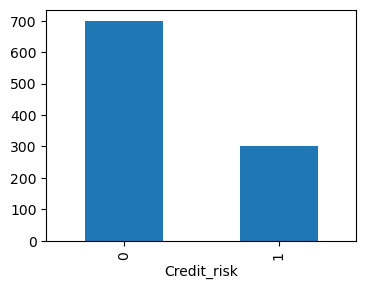

In [97]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('Credit_risk').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Para este ejercicio, se busca minimizar el porcentaje de credit defaults (incumplimientos de pago o  credit_riesk=0) entre los clientes que la institución les otorgó el crédito.

La institución pierde más cuando otorga un crédito a un cliente que no va a pagar que cuando niega una tarjeta de crédito a un buen cliente.

La base de datos tiene 1,000 observaciones, 20 variables predictivas, de las cuáles 13 son nominales y 7 son numéricas más una variable objetivo (dicotómica). El 30% de la muestra incumplió en el pago de su crédito. Es decir, la clase minoritaria equivale al 30% de la base de datos de estudio, es una clase *ligeramente* desbalanceada, pero lo suficientemente robusta para que el(los) modelo(s) a utilizar puedan generar estadísticos robustos de discriminación y desempeño.

Como se comentó previamente, para la institución de crédito es peor (económicamente hablando) otorgar un crédito a un mal pagador pensando que iba a ser bueno pagador que rechazar una solicitud de crédito de un buen pagador, pensando que incumpliría su compromiso con la compañía.

La **sensibilidad** predice la capacidad que tiene el modelo para identificar un mal pagador, es decir VP / (VP + FN), por eso este es el indicador que recomendamos darle mayor relevancia.

**Conclusiones**

Dada la naturaleza del evento a modelar, las métricas que sugeriríamos usar son:
-  **Area under de ROC curve (AUC)**.  Al trazar la tasa positiva verdadera (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad) que nos permite estimar/observar el balance entre la curva de VP (verdaderos positivos) y la tasa de FP
- **LogLoss (o Entropy)**. Esto debido a que es una métrica basada en las probabilidades de que ocurra el evento que estamos modelando. A medida que la probabilidad estimada (del evento a predecir) de la clase verdadera (en este caso que el j-ésimo individuo de la muestra incumpla su pago) la función de pérdida aumenta rápidamente. Dicha métrica mide el desempeño de un modelo de clasificación en el que la entrada de la predicción es un valor de probabilidad entre 0 y 1. La pérdida logarítmica aumenta a medida que la probabilidad predicha se aleja de la etiqueta real. El objetivo de cualquier modelo de aprendizaje automático es minimizar este valor. Por lo tanto, una pérdida logarítmica menor es mejor, con un modelo perfecto teniendo una pérdida logarítmica de 0.
- **Accuracy** nos puede ayudar ya que no es una muestra evidentemente desbalanceada (30% de la muestra pertenece a la clase minoritaria), o en su caso podríamos usar **F-measure**, al ser una ponderación entre *recall (o sensibilidad)* y precisión.
- Otra variante que profesionalmente he usando para este tipo de modelos es el **estadístico KS** (Kolmogorov - Smirnov), que mide el rendimiento de los modelos de clasificación. Más exactamente, K-S es una medida del grado de separación entre las distribuciones positivas y negativas.

#### **4. Telco customer churn dataset**

In [99]:
#Importamos la data
df = pd.read_excel("data/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [100]:
#Eliminamos las columnas que no nos interesan. Estas columnas repiten la misma información de 'Churn Value'
df.drop(['Churn Label', 'Churn Score', 'Churn Reason', 'CLTV'], axis=1, inplace=True)

In [101]:
#Definimos las Xs y la Y
X = df.drop(['Churn Value'], axis =1)
y = df[['Churn Value']]

In [102]:
#Confirmamos los cambios
X.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3


In [103]:
y.head()

,Churn Value
0,1
1,1
2,1
3,1
4,1


In [104]:
#Buscamos cuando representa cada una de las clases
(y.value_counts()/len(y)) * 100

Churn Value
0              73.463013
1              26.536987
dtype: float64

##### **Conclusiones**

Del análisis anterior podemos concluir lo siguiente:

* Es un problema de clasificación de dos clases, donde la clase positiva es el cliente que se pierde y la clase negativa el cliente que se queda.
* Para el negocio, sale más caro identificar a un cliente perdido como cliente actual (falso negativo) a que identificar un cliente actual como perdido (falso positivo). Esto porque la organización podría dejar de tomar acciones para recuperar a estos clientes, o bien, no entender bien el perfil de aquellos que pierde.
* Estamos ante un conjunto de datos desbalanceado, puesto que la clase negativa (valor 0) representa un 73% y la clase positiva un 27%. Esto significa que el modelo requiere de alguna estrategia de balanceo.
* La mayoría de las variables son categóricas, siendo solo dos de ellas del tipo numéricas (Monthly Charges y Total Charges).

En ese sentido, para este conjunto de datos se recomiendan las siguientes métricas:

Métricas del tipo Threshold
* **Mean F-Measure (MFM):** Es el valor promedio del F1-Score, el cual toma en consideración la precisión y el recall
* **Accuracy (ACC):** Es el porcentaje de predicciones acertadas por el modelo

Métricas del tipo Rank:

* **Area under the Roc Curve (AUC):** Es una métrica que representa la probabilidad de que el modelo asigne una mayor prioridad a una clase positiva seleccionada aleatoriamente que a una clase negativa seleccionada de forma aleatoria.


Se seleccionan estas métricas debido a que entre los tipos threshold y rank existe una menor correlación entre los resultados que estas arrojan, como se puede observar en el dendrograma del artículo que se encuentra en la figura #3. Por ejemplo, en el dendrograma se puede apreciar que estos dos tipos de métricas en modelos de clasificación, tanto para clases balanceadas como desbalanceadas, se unen a partir de una distancia un poco mayor a 0.3, la cual representa una correlación menor a 0.7. Esto indica que la información aportada por ambos tipos de métricas es diferente.

Por otro lado, las métricas dentro del grupo de métricas tipo rank tiene una alta correlación (tanto para clases balanceadas como desbalanceadas), como puede observarse en el diagrama. Para este grupo, las métricas se unen en una distancia menor a 0.1 aproximadamente, lo cual representa una correlación estrecha superior a 0.9. Es por ello que para este grupo de métrica solo fue seleccionada una sola (AUNU), ya que las demás aportarían la misma información que esta.

Por último, de las métricas tipo Threshold fueron seleccionadas dos ya que en el diagrama puede observarse que para clases desbalanceadas la correlación entre MFM y ACC es menor (menor a 0.8 aproximadamente) que en clases balanceadas, la cual ronda en más de 0.9. Esto significa que ambas métricas aportarían información diferente sobre el modelo a utilizar.


#### **5. Qualitative Banckruptcy dataset**

In [105]:
# Cargamos los datos 
df = pd.read_csv('data/Qualitative_Bankruptcy.data.txt', header = None)
df.columns = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [106]:
# Información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [107]:
# Descripción general de los datos
df.describe(include = 'all')

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [108]:
# Conteo de la variable a predecir
df.Class.value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [109]:
# Porcentajes de la variable a predecir
df.Class.value_counts(normalize = True)*100

NB    57.2
B     42.8
Name: Class, dtype: float64

##### Conclusiones

El dataset *Qualitative_Bankruptcy* consta de 7 columnas y 250 filas, con él se intenta predecir el estado financiero (B - Bancarrota / NB - No Bancarrota) tomando en cuenta 6 características cualitativas. Dentro del dataset sólo vamos a encontrar 3 resultados dentro de las 6 de características: *P* (positivo), *A* (promedio) y *N* (negativo).

El dataset está balanceado porque consta de 57.2% de NB (No Bancarrota) y 42.8% de B (Bancarrota), también podemos observar que en todas las demás columnas el valor que más predomina es el N (negativo).

Las caracteríasticas del modelo son:
* Problema de clasificación binario (B/NB).
* Todas las características son cualitativas.
* El dataset es de tamaño pequeño (250 filas).

Para la evaluación del modelo las mejores métricas que podríamos utilizar son las de tipo *rank* seguidas del de tipo *threshold* debido a que son las que menor correlación tienen y nos pueden dar más información necesaria para evaluar si es un buen modelo, también sirven bien con dataset balanceados y de menor tamaño. Algunas métricas recomendadas serían: 

Métrica  |Tipo
---------|-----------
MPR      | Rank
MAE      | Rank
MSE      | Rank
LogL     | Rank
CalB     | Rank
AUI1p    | Rank
Accuracy | Threshold
Kaps     | Threshold


#### **Bibliografía**

* Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. Sebastopol: O’Reilly Media
* Ferri, Cèsar & Hernandez-Orallo, Jose & Modroiu, R.. (2009). An Experimental Comparison of Performance Measures for Classification. Pattern Recognition Letters. 30. 27-38. 10.1016/j.patrec.2008.08.010. 